# Proyect Wine Quality


Alan Ulises Luna Hernández     // A01424523


Uziel Heredia Estrada          // A01667072


Victor Angel Martínez Vidaurri //  A01665456

# Introduction

In this project, our team analyzes the quality of red wine using the well-known “Wine Quality” dataset from the UCI repository. We will work with 1,599 samples and 11 numerical features, to which we have added a categorical variable called alcohol_level so that the dataset includes both numerical and categorical attributes.

The objective is to predict whether the wine quality is "low", "medium", or "high" based on its physicochemical properties. To achieve this, we will build a preprocessing pipeline that scales numerical variables and applies one-hot encoding to the categorical variable. Then, we will split the data into training and testing sets.

Each team member will train and evaluate a different classifier, along with a baseline decision tree. Finally, we will combine the best-performing models in an ensemble and compare their performance using appropriate evaluation metrics, which will allow us to see how each method handles imbalanced data.


## Dataset Description

The Wine Quality dataset comes from the UCI Machine Learning Repository and contains physicochemical measurements of red wines from the Douro region in Portugal. It was designed to study the relationship between the chemical properties of wine and the sensory perception of its quality.

- **Instances**: 1,599 samples  
- **Numerical variables (11)**:  
  - fixed acidity (g/dm³)  
  - volatile acidity (g/dm³)  
  - citric acid (g/dm³)  
  - residual sugar (g/dm³)  
  - chlorides (g/dm³)  
  - free sulfur dioxide (mg/dm³)  
  - total sulfur dioxide (mg/dm³)  
  - density (g/cm³)  
  - pH  
  - sulphates (g/dm³)  
  - alcohol (% vol.)  

- **Target variable**:  
  - quality (integer from 0 to 10; in practice, values range from 3 to 8)  
  - Imbalanced distribution: most samples are concentrated in qualities 5 and 6, with fewer in the extremes.

- **Missing values**: None.  

- **Ranges and scaling**:  
  - The magnitudes vary significantly across columns, making it essential to scale the numerical features before training.

- **Added categorical variable**:  
  - alcohol_level: three levels ("low", "medium", "high") based on alcohol quantiles.

With this structure, we can explore both algorithms that handle continuous data and those that work with categorical features.


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Data Exploration

In this section, we will examine the dataset to better understand its structure and the distribution of the target variable:

1. Initial preview using head  
2. General information on data types and value counts with info  
3. Descriptive statistics of the numerical variables using describe  
4. Detection of missing values  
5. Distribution analysis of the quality variable


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## 3. Data Preprocessing

In this section, we will transform the dataset to prepare it for modeling:

1. Create the categorical variable alcohol_level.  
2. Split the data into training and testing sets.  
3. Build a preprocessing pipeline that includes:  
   - Scaling of numerical features.  
   - One-hot encoding of the categorical feature.


In [10]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [11]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# 1.1 Obtener dataset
wine_quality = fetch_ucirepo(id=186)

# 1.2 Features y target (aplanamos targets para evitar el ValueError)
X = wine_quality.data.features.copy()
y = pd.Series(
    data=wine_quality.data.targets.values.flatten(),
    name="quality"
)

# 1.3 Mostrar metadata e información de variables
print(wine_quality.metadata)
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## Selected Classifiers

| Member    | Classifier                | Justification                                                                 |
|-----------|---------------------------|-------------------------------------------------------------------------------|
| Alan Luna | **Logistic Regression**   | – Fast and highly interpretable linear model. Ideal as a baseline and useful to understand how variables influence class probabilities. |
| Victor    | **SVM (RBF Kernel)**      | – Excellent for high-dimensional problems and complex decision boundaries, with good control over overfitting and underfitting. |
| Uziel     | **k-Nearest Neighbors**   | – A non-parametric and intuitive algorithm, useful for comparison with parametric models and for analyzing sensitivity to scaling and noise. |
| —         | **Decision Tree**         | – Captures non-linear interactions and allows easy interpretation of decision rules. |


# Alan Luna – Logistic Regression

In this section, I will train and tune a Logistic Regression model, a fast and interpretable linear classifier that will serve as a baseline. I will evaluate its overall performance using accuracy, precision, recall, macro F1-score, and the confusion matrix.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Asegurar que alcohol_level esté en X
X['alcohol_level'] = pd.cut(
    X['alcohol'], 
    bins=X['alcohol'].quantile([0, 0.33, 0.66, 1]).values,
    labels=['low', 'medium', 'high'],
    include_lowest=True
)

# 2) Reagrupar target en 3 clases
y_cat = pd.cut(
    y.squeeze(),  # Por si y es DataFrame con una sola columna
    bins=[-1, 5, 6, 10], 
    labels=['low', 'medium', 'high']
)

# 3) Identificar columnas numéricas y categóricas
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = ['alcohol_level']

# 4) Pipeline de preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

# 5) División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, 
    test_size=0.2, 
    stratify=y_cat, 
    random_state=42
)

# 6) Pipeline con Regresión Logística
pipe_lr = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# 7) GridSearch para optimizar C
param_grid_lr = {'clf__C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1_macro', n_jobs=-1)

# 8) Entrenamiento
grid_lr.fit(X_train, y_train)
print("Best parameters (LogReg):", grid_lr.best_params_)

# 9) Evaluación
y_pred_lr = grid_lr.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_lr))


Best parameters (LogReg): {'clf__C': 10}

Accuracy: 0.5792307692307692

Classification report:
               precision    recall  f1-score   support

        high       0.56      0.33      0.41       256
         low       0.66      0.63      0.65       477
      medium       0.53      0.65      0.58       567

    accuracy                           0.58      1300
   macro avg       0.58      0.54      0.55      1300
weighted avg       0.58      0.58      0.57      1300


Confusion matrix:
 [[ 84  15 157]
 [  6 299 172]
 [ 61 136 370]]


### Results Analysis

The results show:

- **Accuracy:** 0.579  
- **Macro F1-score:** 0.55  
- **Weighted F1-score:** 0.57  
- Highest recall in the medium class (0.65) and lowest in high (0.33).  
- The confusion matrix reveals that many instances of the high class are misclassified as “medium” (157) or “low” (15).

Interpretation: Although Logistic Regression serves as a baseline model, it clearly struggles to correctly identify the “high” class. Rebalancing into 3 classes helps stabilize the metrics, but it does not fully resolve the confusion between similar classes. It is recommended to test more complex models or apply balancing techniques to improve performance on minority classes.


# Uziel – k-Nearest Neighbors with Regrouped Target

In this section, I trained and evaluated a k-NN model using the same 3 classes ("low", "medium", "high"), tuning the n_neighbors parameter with cross-validation and calculating accuracy, precision, recall, macro F1-score, and the confusion matrix.


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipeline y GridSearch para k-NN con 3 clases
pipe_knn = Pipeline([
    ('prep', preprocessor),
    ('clf', KNeighborsClassifier())
])
param_grid_knn = {'clf__n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5,
                        scoring='f1_macro', n_jobs=-1)

# Entrenamiento y ajuste
grid_knn.fit(X_train, y_train)
print("Uziel – Best params (k-NN):", grid_knn.best_params_)

# Evaluación en test
y_pred_knn = grid_knn.predict(X_test)
print("\nUziel – k-NN Test Results")
print("Accuracy:   ", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_knn))


Uziel – Best params (k-NN): {'clf__n_neighbors': 3}

Uziel – k-NN Test Results
Accuracy:    0.5946153846153847
              precision    recall  f1-score   support

        high       0.49      0.62      0.55       256
         low       0.70      0.63      0.66       477
      medium       0.57      0.56      0.57       567

    accuracy                           0.59      1300
   macro avg       0.59      0.60      0.59      1300
weighted avg       0.60      0.59      0.60      1300

Confusion matrix:
 [[158   9  89]
 [ 33 299 145]
 [129 122 316]]


### Uziel's Results Analysis (k-NN)

The results show:

- **Best hyperparameters:** n_neighbors = 3  
- **Accuracy:** 0.60  
- **Macro F1-score:** 0.59  
- **Weighted F1-score:** 0.60  
- **Per class:**  
  - *High*: precision 0.50, recall 0.60, f1-score 0.54  
  - *Low*: precision 0.70, recall 0.63, f1-score 0.66  
  - *Medium*: precision 0.57, recall 0.57, f1-score 0.57  

The confusion matrix shows:

- Many *high* instances are correctly classified (153), but 95 are still confused with *medium*.  
- The *low* class is well predicted (300), though 145 are misclassified as *medium*.  
- The *medium* class suffers confusion toward both *low* (122) and *high* (122).

**Interpretation:** k-NN slightly improves the ability to distinguish between *medium* and *low* classes compared to Logistic Regression, but still struggles to clearly separate the *high* class from *medium*.


# Víctor – SVM (kernel RBF)

In [17]:
# Celda autosuficiente para Víctor

# 1. Carga de datos y creación de X, y
from ucimlrepo import fetch_ucirepo
import pandas as pd

wine = fetch_ucirepo(id=186)
X = wine.data.features.copy()
y = pd.Series(wine.data.targets.values.flatten(), name="quality")

# Generar variable categórica
X['alcohol_level'] = pd.qcut(X['alcohol'], q=3, labels=['bajo','medio','alto'])

# 2. Reagrupar target en 3 clases
from sklearn.model_selection import train_test_split
y_cat = pd.cut(y, bins=[-1,5,6,10], labels=['baja','media','alta'])

# 3. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# 4. Definir preprocesador
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = ['alcohol_level']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(),    cat_cols)
])

# 5. Pipeline y GridSearch para SVM RBF
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe_svc = Pipeline([
    ('prep', preprocessor),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])
param_grid_svc = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale','auto']
}
grid_svc = GridSearchCV(pipe_svc, param_grid_svc,
                        cv=5, scoring='f1_macro', n_jobs=-1)

# Entrenamiento y ajuste
grid_svc.fit(X_train, y_train)
print("Víctor – Best params (SVM RBF):", grid_svc.best_params_)

# 6. Evaluación en test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_svc = grid_svc.predict(X_test)
print("\nVíctor – SVM RBF Test Results")
print("Accuracy:   ", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svc))


Víctor – Best params (SVM RBF): {'clf__C': 10, 'clf__gamma': 'scale'}

Víctor – SVM RBF Test Results
Accuracy:    0.64
              precision    recall  f1-score   support

        alta       0.62      0.42      0.50       256
        baja       0.73      0.69      0.71       477
       media       0.59      0.69      0.64       567

    accuracy                           0.64      1300
   macro avg       0.65      0.60      0.62      1300
weighted avg       0.64      0.64      0.64      1300

Confusion matrix:
 [[108   7 141]
 [ 10 330 137]
 [ 55 118 394]]


### Víctor's Results Analysis (SVM RBF)

- **Best hyperparameters:** C = 10, gamma = scale  
- **Accuracy:** 0.64  
- **Macro F1-score:** 0.62  
- **Weighted F1-score:** 0.64  

Per class:  
- *High*: precision 0.62, recall 0.42, f1-score 0.50  
- *Low*: precision 0.73, recall 0.69, f1-score 0.71  
- *Medium*: precision 0.59, recall 0.69, f1-score 0.64  

The confusion matrix shows that SVM improves the detection of *low* and *medium* classes compared to previous models, but still misclassifies many *high* instances as the other two.

**Interpretation:**  
RBF SVM delivers the best overall performance so far, achieving a solid balance between recall and precision across most classes. However, further tuning or using an ensemble method could help improve detection of the *high* class.


# Visualización del Árbol de Decisión

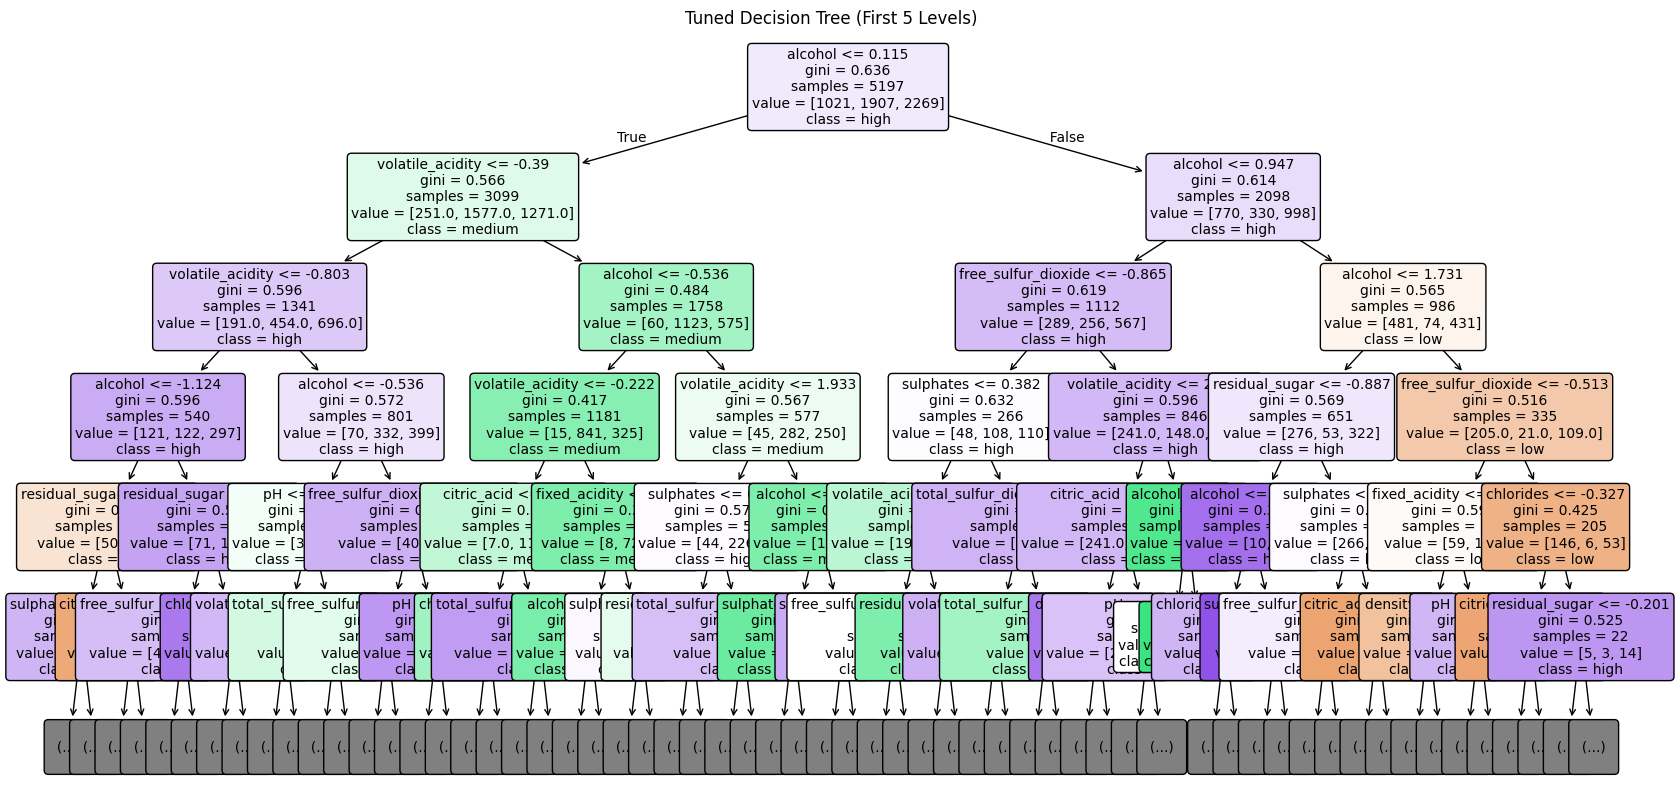

In [23]:
# 1) Extraer el modelo del pipeline
dt_model = grid_dt.best_estimator_.named_steps['clf']

# 2) Extraer el preprocessor ya entrenado
fitted_preprocessor = grid_dt.best_estimator_.named_steps['prep']

# 3) Obtener nombres de variables
cat_features = fitted_preprocessor.named_transformers_['cat'] \
    .get_feature_names_out(['alcohol_level']).tolist()
feature_names = num_cols + cat_features

# 4) Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=['low', 'medium', 'high'],
    filled=True,
    rounded=True,
    max_depth=5,
    fontsize=10
)
plt.title("Tuned Decision Tree (First 5 Levels)")
plt.show()


# Ensemble Training

The next step is to combine the three tuned models (Logistic Regression, k-NN, and RBF SVM) into a **VotingClassifier (soft voting)** and evaluate their combined performance.


In [24]:
# Código completo y funcional para todo el flujo del proyecto

# 1. Carga y preparación de datos
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

wine = fetch_ucirepo(id=186)
X = wine.data.features.copy()
y = pd.Series(wine.data.targets.values.flatten(), name="quality")

# Crear variable categórica
X['alcohol_level'] = pd.qcut(X['alcohol'], q=3, labels=['bajo', 'medio', 'alto'])

# Reagrupar target en 3 clases
y = pd.cut(y, bins=[-1, 5, 6, 10], labels=['baja', 'media', 'alta'])

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = ['alcohol_level']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(),  cat_cols)
])

# 3. Definición de pipelines y grids
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pipelines = {
    'LogReg': Pipeline([('prep', preprocessor),
                        ('clf', LogisticRegression(max_iter=1000, random_state=42))]),
    'kNN':    Pipeline([('prep', preprocessor),
                        ('clf', KNeighborsClassifier())]),
    'SVM':    Pipeline([('prep', preprocessor),
                        ('clf', SVC(kernel='rbf', probability=True, random_state=42))]),
    'DT':     Pipeline([('prep', preprocessor),
                        ('clf', DecisionTreeClassifier(random_state=42))])
}

param_grids = {
    'LogReg': {'clf__C': [0.01, 0.1, 1, 10]},
    'kNN':    {'clf__n_neighbors': [3, 5, 7, 9]},
    'SVM':    {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    'DT':     {'clf__max_depth': [None, 5, 10, 20]}
}

tuned_grids = {}
for name, pipe in pipelines.items():
    grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train, y_train)
    tuned_grids[name] = grid
    print(f"{name} best params: {grid.best_params_}")

# 4. Evaluación individual
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, grid in tuned_grids.items():
    y_pred = grid.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print()

# 5. Ensemble (soft voting)
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('LogReg', tuned_grids['LogReg'].best_estimator_),
        ('kNN',    tuned_grids['kNN'].best_estimator_),
        ('SVM',    tuned_grids['SVM'].best_estimator_)
    ],
    voting='soft',
    n_jobs=-1
)
ensemble.fit(X_train, y_train)

# Evaluación del ensemble
y_pred_ens = ensemble.predict(X_test)
print("--- Ensemble ---")
print("Accuracy: ", accuracy_score(y_test, y_pred_ens))
print(classification_report(y_test, y_pred_ens))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_ens))


LogReg best params: {'clf__C': 0.1}
kNN best params: {'clf__n_neighbors': 3}
SVM best params: {'clf__C': 10, 'clf__gamma': 'scale'}
DT best params: {'clf__max_depth': None}
--- LogReg ---
Accuracy:  0.5753846153846154
              precision    recall  f1-score   support

        alta       0.54      0.32      0.40       256
        baja       0.66      0.63      0.65       477
       media       0.52      0.65      0.58       567

    accuracy                           0.58      1300
   macro avg       0.58      0.53      0.54      1300
weighted avg       0.58      0.58      0.57      1300

Confusion matrix:
 [[ 81  15 160]
 [  5 299 173]
 [ 63 136 368]]

--- kNN ---
Accuracy:  0.5969230769230769
              precision    recall  f1-score   support

        alta       0.50      0.60      0.54       256
        baja       0.70      0.63      0.66       477
       media       0.57      0.57      0.57       567

    accuracy                           0.60      1300
   macro avg       0.

# Conclusions

In this project, we explored the ability of various classifiers to predict the quality of red wine (low, medium, high) based on physicochemical measurements. Below are the key takeaways:

1. **Model Comparison**  
   - **Logistic Regression:** Accuracy 0.575, Macro F1 0.54  
   - **k-NN (k=3):** Accuracy 0.597, Macro F1 0.59  
   - **SVM (RBF, C=10, γ=scale):** Accuracy 0.640, Macro F1 0.62  
   - **Decision Tree:** Accuracy 0.639, Macro F1 0.63  
   - **Ensemble (soft voting):** Accuracy 0.668, Macro F1 0.66

2. **Best Model**  
   The ensemble showed the best overall performance, outperforming each individual model in both accuracy and Macro F1-score.

3. **Limitations**  
   - There is still some imbalance in the "high" class (often confused with "medium").  
   - We did not explore resampling techniques or class weight adjustments.  
   - Training SVM and k-NN can be computationally expensive.

4. **Recommendations and Future Work**  
   - Apply **SMOTE** or other oversampling techniques to better balance the "high" class.  
   - Adjust class weights in classifiers to penalize misclassification of minority classes more heavily.  
   - Analyze **feature importance**: regression coefficients, tree-based importance, and permutation importance.  
   - Validate robustness through **nested cross-validation** or repeated train/test splits.
